### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [7]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 28811.1875
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 27825.0781
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 26842.6621
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 25886.5000
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 25014.5957
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 24239.6660
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 23524.5098
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 22846.3926
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 22204.9688
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 21607.6660
Epoch 11/300
1/1 [==============================] - 0s 11ms/step - loss: 21054.6777
Epoch 12/300
1/1 [==============================] - 0s 25ms/step - loss: 20535.2207
Epoch 

### Predicting For the next 10 data

In [11]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.64284]
1 day input [196.         210.         222.64283752]
1 day output [[232.78018]]
2 day input [210.         222.64283752 232.78018188]
2 day output [[246.1173]]
3 day input [222.64284 232.78018 246.1173 ]
3 day output [[258.72522]]
4 day input [232.78018 246.1173  258.72522]
4 day output [[270.54443]]
5 day input [246.1173  258.72522 270.54443]
5 day output [[284.36755]]
6 day input [258.72522 270.54443 284.36755]
6 day output [[297.89102]]
7 day input [270.54443 284.36755 297.89102]
7 day output [[311.50934]]
8 day input [284.36755 297.89102 311.50934]
8 day output [[326.45602]]
9 day input [297.89102 311.50934 326.45602]
9 day output [[341.47934]]
[222.64284, 232.78018, 246.1173, 258.72522, 270.54443, 284.36755, 297.89102, 311.50934, 326.45602, 341.47934]


In [12]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [13]:
len(timeseries_data)

9

In [14]:
lst_output

[222.64284,
 232.78018,
 246.1173,
 258.72522,
 270.54443,
 284.36755,
 297.89102,
 311.50934,
 326.45602,
 341.47934]

In [15]:
lst_output

NameError: name 'lst' is not defined

### Visualizaing The Output

In [16]:
import matplotlib.pyplot as plt

In [17]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

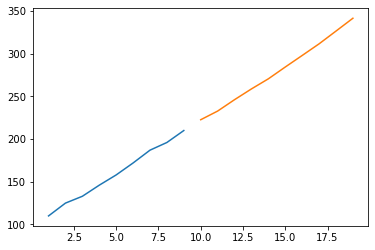

In [18]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
